## Lithofacies Clssification Using Machine Learning Algorithms from Well Log data


Here we are going to implement standard and comprehensive steps to find the best model and hyperparameters in order to predict lithfacies from a well log dataset. Following ML algorithms are going to be used.

1. Decision Trees Classifier
2. Random Forest Classifier
3. Support Vector Machine Classifier
4. XgBoost Classifier

***The Dataset***

This dataset is from Hugoton and Panoma Fields in North America. It contains log records from 10 different wells. Each well consists of 7 differenet features (diffrenret logging method). They are: <br>

1. __GR__: Measures natural radioactivity of a formation<br>
2. __ILD_log10__: Measures resistivty of a formation<br>
3. __PE__: photoelectric effect log<br>
4. __DeltaPHI__: Measures neutron porosity.<br>
5. __PNHIND__: Average of neutron and density log.<br>
6. __NM_M__: Nonmarine-marine indicator<br>
7. __RELPOS__: Relative position<br>

It contains nine different types of facies or lithologies which are:<br>
1. (SS) Nonmarine sandstone<br>
2. (CSiS) Nonmarine coarse siltstone<br>
3. (FSiS) Nonmarine fine siltstone<br>
4. (SiSH) Marine siltstone and shale<br>
5. (MS) Mudstone (type of limestone)<br>
6. (WS) Wackestone (type of limestone)<br>
7. (Dol) Dolomite<br>
8. (PS) Packstone-grainstone (type of limestone)<br>
9. (BS) Phylloid-algal bafflestone (type of limestone)<br>

In [1]:
# importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors
import seaborn as sns
import warnings

plt.style.use('ggplot')
warnings.filterwarnings('ignore') 
pd.set_option('display.max_columns', None)

In [2]:
# dataframe
df = pd.read_csv(r'c:\Users\sanju\Desktop\AI-ML in Oil and Gas industry\facies_vectors.csv')
df

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
4144,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
4145,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
4146,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
4147,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


**1. EDA (Exploratory Data Analysis)**

***1.1 Data Visualization***

In [3]:
# statistical summury of the whole dataset by each column
df.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.100000,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.551500,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


In [4]:
# data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     4149 non-null   int64  
 1   Formation  4149 non-null   object 
 2   Well Name  4149 non-null   object 
 3   Depth      4149 non-null   float64
 4   GR         4149 non-null   float64
 5   ILD_log10  4149 non-null   float64
 6   DeltaPHI   4149 non-null   float64
 7   PHIND      4149 non-null   float64
 8   PE         3232 non-null   float64
 9   NM_M       4149 non-null   int64  
 10  RELPOS     4149 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 356.7+ KB


In [5]:
# Percentage and No. of NaN values in each columns 
for col_name in df.columns:
    
    if df[col_name].isna().sum() == 0:
        print ('Column {0} has 0 NaN values or 0 % NaN values'.format(col_name))
    else:
        print ( 
            'Column {0} has {1} NaN values or {2} percent Nan values'.format( 
            col_name, df[col_name].isna().sum(), round(df[col_name].isna().mean()*100 ,2)
            )
    )

Column Facies has 0 NaN values or 0 % NaN values
Column Formation has 0 NaN values or 0 % NaN values
Column Well Name has 0 NaN values or 0 % NaN values
Column Depth has 0 NaN values or 0 % NaN values
Column GR has 0 NaN values or 0 % NaN values
Column ILD_log10 has 0 NaN values or 0 % NaN values
Column DeltaPHI has 0 NaN values or 0 % NaN values
Column PHIND has 0 NaN values or 0 % NaN values
Column PE has 917 NaN values or 22.1 percent Nan values
Column NM_M has 0 NaN values or 0 % NaN values
Column RELPOS has 0 NaN values or 0 % NaN values


In [6]:
# total number of wells 
print('Total number of wells:', df['Well Name'].nunique())

# Total number of records in each wells
lst_all = df['Well Name'].tolist()                # creating a list containing all well name values in the Well_Name column 
lst_unique = df['Well Name'].unique().tolist()    # List containing Well name

for well_name in lst_unique:                      # Creating a loop for reading number of times a well appears in the datset 
    count = 0                                     # seting an initiator at 0
    for well in lst_all:
        if well== well_name:
            count = count + 1
    print('Well {0} has {1} number of records'.format(well_name, count))
    
# All of the above code can be written in one line using df['Well Name'].value_counts() command


Total number of wells: 10
Well SHRIMPLIN has 471 number of records
Well ALEXANDER D has 466 number of records
Well SHANKLE has 449 number of records
Well LUKE G U has 461 number of records
Well KIMZEY A has 439 number of records
Well CROSS H CATTLE has 501 number of records
Well NOLAN has 415 number of records
Well Recruit F9 has 80 number of records
Well NEWBY has 463 number of records
Well CHURCHMAN BIBLE has 404 number of records


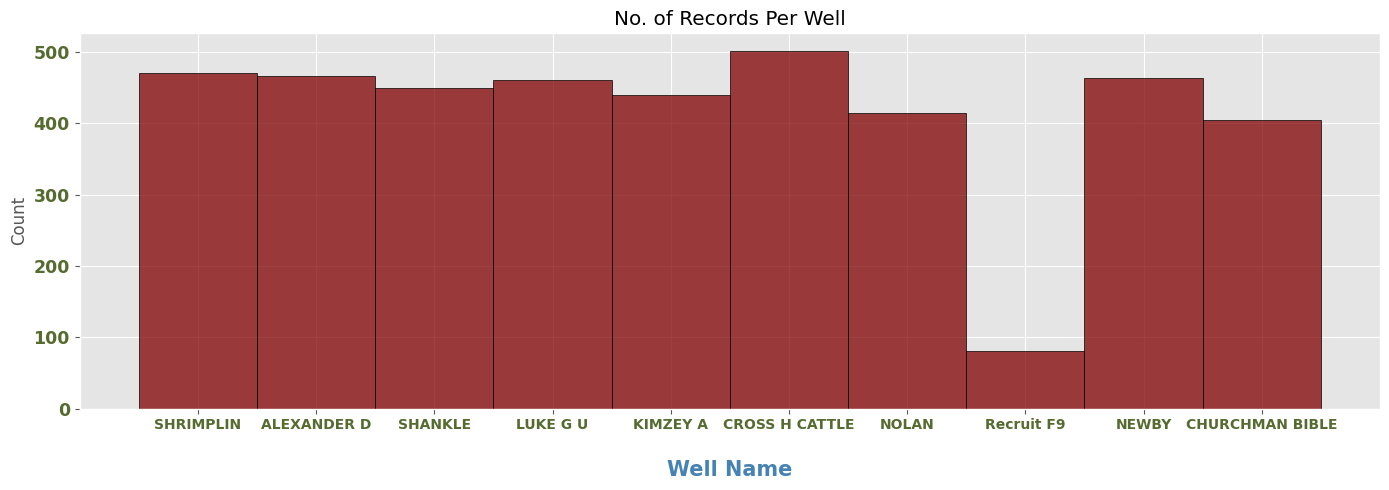

In [7]:
# Histogram plot
fig = plt.figure(figsize= (14,5))
sns.histplot(data= df, 
             x= df['Well Name'],
             stat= 'count', 
             color = 'maroon', edgecolor= 'black')

plt.xlabel('Well Name', color = 'steelblue', fontweight ='bold', fontsize = 15, labelpad= 20)

plt.title('No. of Records Per Well')
plt.yticks(color = 'darkolivegreen', fontsize= 12.5, fontweight = 'bold' )
plt.xticks(color = 'darkolivegreen', fontsize= 10, fontweight = 'bold' )

plt.tight_layout()

In [8]:
# Facies Distribuition
facies_label = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'Dol','PS', 'BS']
facies_count = []   # empty list for appending total number of occurences of each facies

label_count = 1
for label in facies_label:
    cond = df['Facies'] == label_count
    n = df[cond]['Facies'].value_counts().values.item()
    facies_count.append(n)
    print('{0} Facies has {1} number of occurences'.format(label, n))
    
    label_count = label_count + 1

SS Facies has 268 number of occurences
CSiS Facies has 940 number of occurences
FSiS Facies has 780 number of occurences
SiSh Facies has 271 number of occurences
MS Facies has 296 number of occurences
WS Facies has 582 number of occurences
Dol Facies has 141 number of occurences
PS Facies has 686 number of occurences
BS Facies has 185 number of occurences


Text(0.5, 1.0, 'Facies Distribuition')

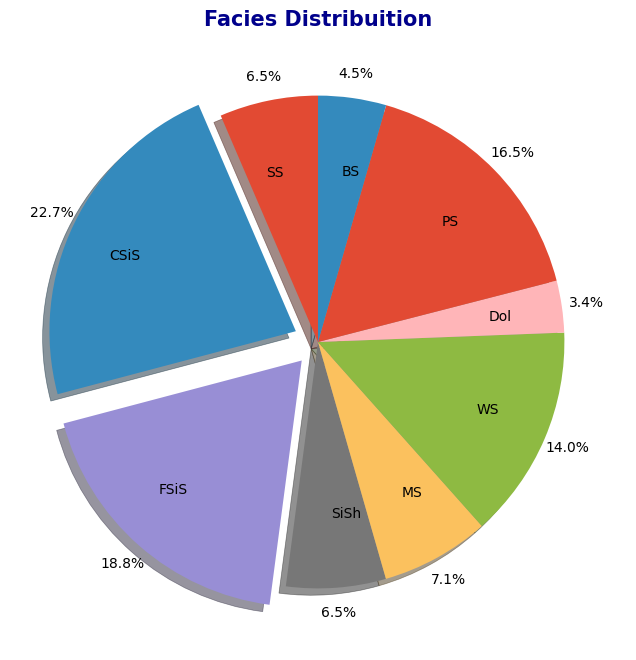

In [9]:
# Facies Distribuition plot
fig,axe = plt.subplots(figsize= (8,8))

axe.pie(x= facies_count, labels= facies_label, autopct= '%1.1f%%',
        startangle=90, shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9},
        pctdistance=1.10, labeldistance=.7, explode= (0, 0.1, 0.1, 0, 0, 0, 0, 0, 0))

axe.set_title('Facies Distribuition', color = 'darkblue', fontsize= 15, fontweight = 'bold')

***1.2 Plotting the log***

We are going to plot log data of only one well

In [10]:
# Color for each facies 
facies_color = ['darkblue', 'maroon', 'peru', 'yellowgreen', 'lightseagreen', 
                'steelblue', 'blueviolet', 'deeppink', 'crimson']

# Assigning color to each facies
facies_label_color = { }
for idx, val in enumerate(facies_label):
    facies_label_color[val] = facies_color[idx] 
    
facies_label_color

{'SS': 'darkblue',
 'CSiS': 'maroon',
 'FSiS': 'peru',
 'SiSh': 'yellowgreen',
 'MS': 'lightseagreen',
 'WS': 'steelblue',
 'Dol': 'blueviolet',
 'PS': 'deeppink',
 'BS': 'crimson'}

In [11]:
# giving facies name to each distinct Facies number
facies_no = df['Facies'].sort_values().unique()

facies_label_no= dict(zip(facies_no, facies_label))       # creating a dictionary

df['Facies_Label'] = df['Facies'].map(facies_label_no)    # mapping the values of label_no dictionaty as per facies number

df.sample(10)

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies_Label
837,6,C LM,ALEXANDER D,3071.5,24.340,0.724,6.000,7.5450,NaN,2,0.862,WS
1318,6,C LM,SHANKLE,2974.5,19.520,0.700,1.000,9.7800,4.6,2,0.985,WS
1941,4,A1 LM,KIMZEY A,2965.5,60.910,0.802,11.829,13.2185,NaN,2,0.417,SiSh
1079,1,B1 SH,SHANKLE,2846.0,61.060,0.425,1.400,13.4650,2.7,1,0.204,SS
3504,8,B2 LM,NEWBY,2937.0,20.930,0.489,-9.800,16.2000,4.4,2,0.407,PS
2116,2,B4 SH,KIMZEY A,3053.0,67.322,0.650,11.279,11.7335,NaN,1,0.722,CSiS
502,9,A1 SH,ALEXANDER D,2903.0,64.740,0.458,15.100,12.7050,NaN,2,0.205,BS
1502,8,A1 LM,LUKE G U,2668.5,52.340,0.904,1.700,5.4500,3.8,2,0.060,PS
877,5,C LM,ALEXANDER D,3091.5,128.300,0.792,10.100,9.8350,NaN,2,0.526,MS
1704,7,B5 LM,LUKE G U,2769.5,22.000,0.194,5.700,13.1500,4.4,2,0.639,Dol


In [12]:
# Function for plotting the log
def log_plot(data2, well_):
    
    depth_data = data2['Depth']                                                     # Storing the depth values in another variable
    indx = 0                                                                        # Starting an initiator index value
    
    data3 = data2[['GR','ILD_log10','DeltaPHI','PHIND','PE']]        # Taking out depth column and storing the rest into another variable
    
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize= (15,8),                     # Creating subplots
                            sharey= True, layout='constrained')        
    
    
    for val in data3.columns:
        axes[indx].plot(data3[val], depth_data, linestyle = 'solid', 
        color = facies_color[indx],
        linewidth = 1)
        
        axes[indx].set_title(val, color = 'darkblue', 
                            fontsize= 12.5, fontweight = 'bold')        # title for every plot
        axes[indx].invert_yaxis()                                       # reversing the y axis
        
        axes[indx].set_xlim(data3[val].min(), data3[val].max())         # setting limits for x_axis and y_axis
        axes[indx].set_ylim(depth_data.max(), depth_data.min())
        
        indx = indx + 1                                                 # Increment of the index
        
    fig.suptitle(str(well_), color = 'darkgreen',                    # title of the figure
                            fontsize= 15, fontweight = 'bold')

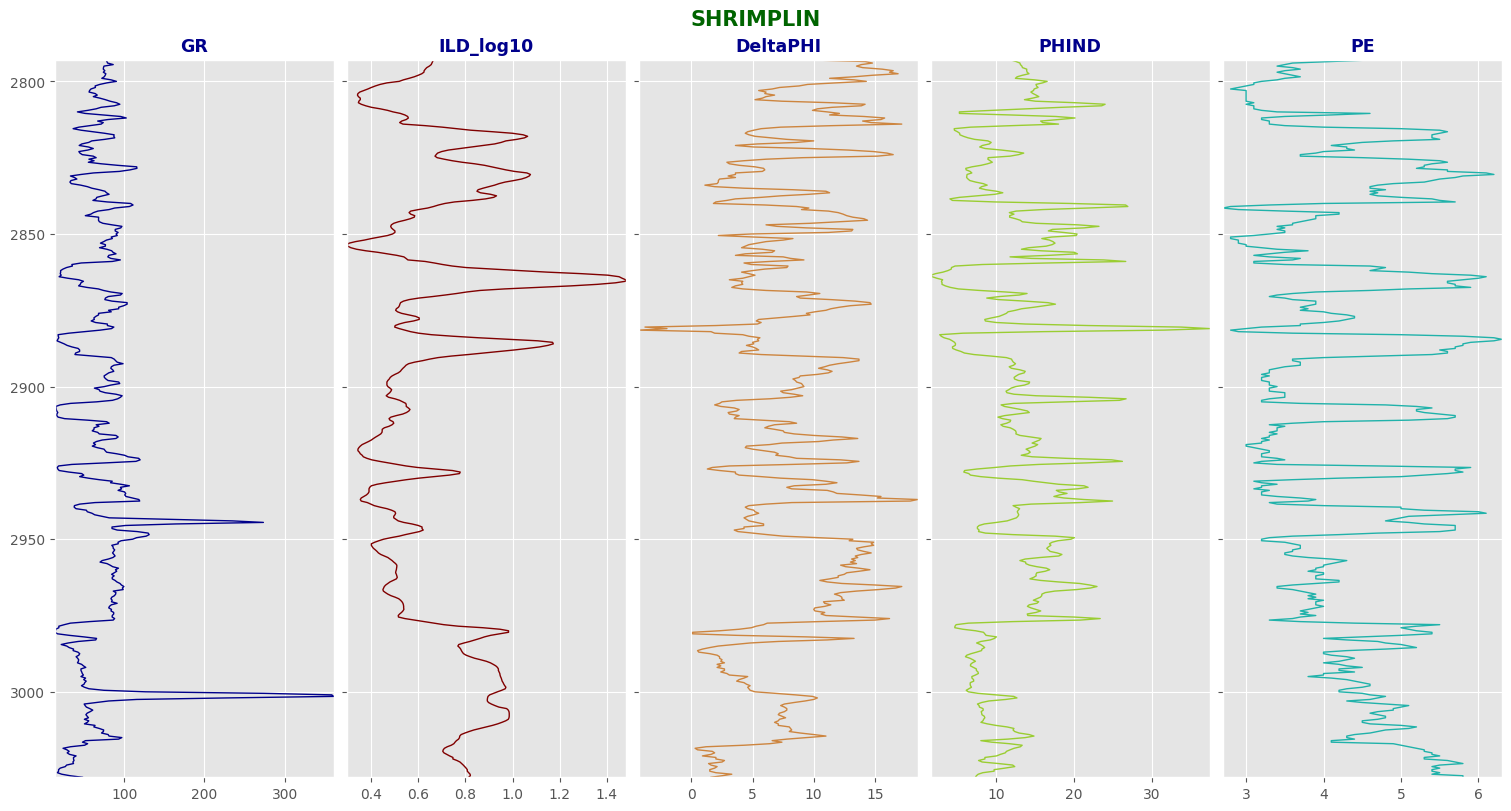

In [13]:
cond = df['Well Name'] == 'SHRIMPLIN'      # creating a condition for filtering only one well
data = df[cond].sort_values(by= 'Depth')   # sorting the dataset with respect to depth 

data2 = data[['Depth','GR','ILD_log10','DeltaPHI','PHIND','PE','Facies_Label']] # taking the neccesary columns only
well = df.iloc[1,2]

# calling the fucntion
log_plot(data2, well)

Text(0.45, 0.92, 'Well: SHRIMPLIN Lithology')

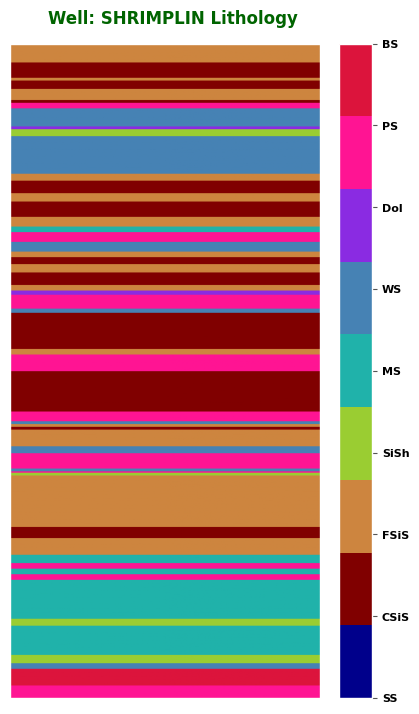

In [14]:
facies = data2.loc[:, 'Facies_Label'].to_frame()
# Map the column values to colors
facies['Color'] = facies['Facies_Label'].map(facies_label_color)

# Create a color image based on the column values        
# Convert color names to RGB tuples using matplotlib.colors
color_array = np.array([mcolors.to_rgba(color) for color in facies['Color']])

# Reshape to a 2D array for image representation (one row per value)
# Assume each row represents a pixel row in the image
color_image = color_array.reshape((len(facies), 1, 4))

# Figure object
fig_, axes_ = plt.subplots(1,1,figsize=(5,8.5))
im = axes_.imshow(color_image, aspect='auto', vmin=1,vmax=9)

# Remove ticks and labels
axes_.set_xticks([])
axes_.set_yticks([])

# Creating a ListedColormap from the color_map
cmap = mcolors.ListedColormap([facies_label_color[value] for value in facies_label_color.keys()])

# Creating a ScalarMappable to associate the color map with the values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(facies_label_color)-1))
sm.set_array([])

# Adding colorbar, specifying the unique values in the correct order
cbar = plt.colorbar(sm, ticks=np.arange(len(facies_label_color)), orientation='vertical')

# Setting the labels to the unique values
cbar.ax.set_yticklabels(list(facies_label_color.keys()),fontsize= 8, fontweight = 'bold', color = 'black')  

# title of the figure
fig_.suptitle('Well: SHRIMPLIN Lithology', color = 'darkgreen',              
                            fontsize= 12, fontweight = 'bold', y= 0.92, x= 0.45)

Now we know features that are too correlated, we have to remove one, as this may worsen the model. 

1. Beacuse of curse of dimensionality, which basically says having large number of features or columns equal to higly sparse data. which basically increases model prediction time and decreases its performance. Thus we need to remove features that are correlated as removing them won't effect our model performamce. 
2. Decreasing harmful bias by removing correalted features. (https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features)

1. For linear models (e.g., linear regression or logistic regression), multicolinearity can yield solutions that are wildly varying and possibly numerically unstable.
2. Random forests can be good at detecting interactions between different features, but highly correlated features can mask these interactions.

In [15]:
# Correaltion among the features
data_tmp = df[['Facies','GR', 'ILD_log10','DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS']]

data_tmp.corr(method= 'pearson').style.background_gradient(cmap='Spectral')

,Facies,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
Facies,1.000000,-0.386677,0.383166,-0.235005,-0.356453,0.704231,0.852721,0.076761
GR,-0.386677,1.000000,-0.205855,0.178863,0.270729,-0.289023,-0.316284,-0.182051
ILD_log10,0.383166,-0.205855,1.000000,-0.104827,-0.544416,0.384589,0.493570,0.088227
DeltaPHI,-0.235005,0.178863,-0.104827,1.000000,-0.189355,0.011489,-0.177500,0.022470
PHIND,-0.356453,0.270729,-0.544416,-0.189355,1.000000,-0.573418,-0.481024,-0.033328
PE,0.704231,-0.289023,0.384589,0.011489,-0.573418,1.000000,0.657089,0.018905
NM_M,0.852721,-0.316284,0.493570,-0.177500,-0.481024,0.657089,1.000000,0.034015
RELPOS,0.076761,-0.182051,0.088227,0.022470,-0.033328,0.018905,0.034015,1.000000


***1.3 Predicting Missing values***

In [16]:
df.isna().sum() 

Facies            0
Formation         0
Well Name         0
Depth             0
GR                0
ILD_log10         0
DeltaPHI          0
PHIND             0
PE              917
NM_M              0
RELPOS            0
Facies_Label      0
dtype: int64

Above code telling us that column PE has 917 NaN values. In correlation matrix this PE column does have importance. 

Thus, we are going to predict those missing values using ML regressor algorithms. 

First we need to find out the wells which have missing PE values

In [17]:
df_tmp = df.loc[df['PE'].isna()]
df_tmp['Well Name'].unique()                   # Only these three Well have missing PE values. 

array(['ALEXANDER D', 'KIMZEY A', 'Recruit F9'], dtype=object)

In [18]:
# importing ML models
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [19]:
# dummy variable for facies and NM_M column as they are categorical column 
df_ = pd.get_dummies(df, columns=['Formation', 'Well Name'], dtype= 'int', prefix=['formation', 'well name'], drop_first= True)

df_pred = df_[['Facies', 'Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M',
       'RELPOS', 'formation_A1 SH', 'formation_B1 LM', 'formation_B1 SH',
       'formation_B2 LM', 'formation_B2 SH', 'formation_B3 LM',
       'formation_B3 SH', 'formation_B4 LM', 'formation_B4 SH',
       'formation_B5 LM', 'formation_B5 SH', 'formation_C LM',
       'formation_C SH', 'well name_CROSS H CATTLE', 'well name_LUKE G U',
       'well name_NEWBY', 'well name_NOLAN', 'well name_Recruit F9',
       'well name_SHANKLE', 'well name_SHRIMPLIN']].dropna()     # only taking the important columns and non-null records

# input features
X = df_pred[['Facies', 'Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'NM_M',
       'RELPOS', 'formation_A1 SH', 'formation_B1 LM', 'formation_B1 SH',
       'formation_B2 LM', 'formation_B2 SH', 'formation_B3 LM',
       'formation_B3 SH', 'formation_B4 LM', 'formation_B4 SH',
       'formation_B5 LM', 'formation_B5 SH', 'formation_C LM',
       'formation_C SH', 'well name_CROSS H CATTLE', 'well name_LUKE G U',
       'well name_NEWBY', 'well name_NOLAN', 'well name_Recruit F9',
       'well name_SHANKLE', 'well name_SHRIMPLIN']]

X_missing = df_[['Facies', 'Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND','NM_M',
       'RELPOS', 'formation_A1 SH', 'formation_B1 LM', 'formation_B1 SH',
       'formation_B2 LM', 'formation_B2 SH', 'formation_B3 LM',
       'formation_B3 SH', 'formation_B4 LM', 'formation_B4 SH',
       'formation_B5 LM', 'formation_B5 SH', 'formation_C LM',
       'formation_C SH', 'well name_CROSS H CATTLE', 'well name_LUKE G U',
       'well name_NEWBY', 'well name_NOLAN', 'well name_Recruit F9',
       'well name_SHANKLE', 'well name_SHRIMPLIN']]

# output features
y= df_pred[['PE']]

In [20]:
df_pred

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,formation_A1 SH,formation_B1 LM,formation_B1 SH,formation_B2 LM,formation_B2 SH,formation_B3 LM,formation_B3 SH,formation_B4 LM,formation_B4 SH,formation_B5 LM,formation_B5 SH,formation_C LM,formation_C SH,well name_CROSS H CATTLE,well name_LUKE G U,well name_NEWBY,well name_NOLAN,well name_Recruit F9,well name_SHANKLE,well name_SHRIMPLIN
0,3,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144,5,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4145,5,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4146,5,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4147,5,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


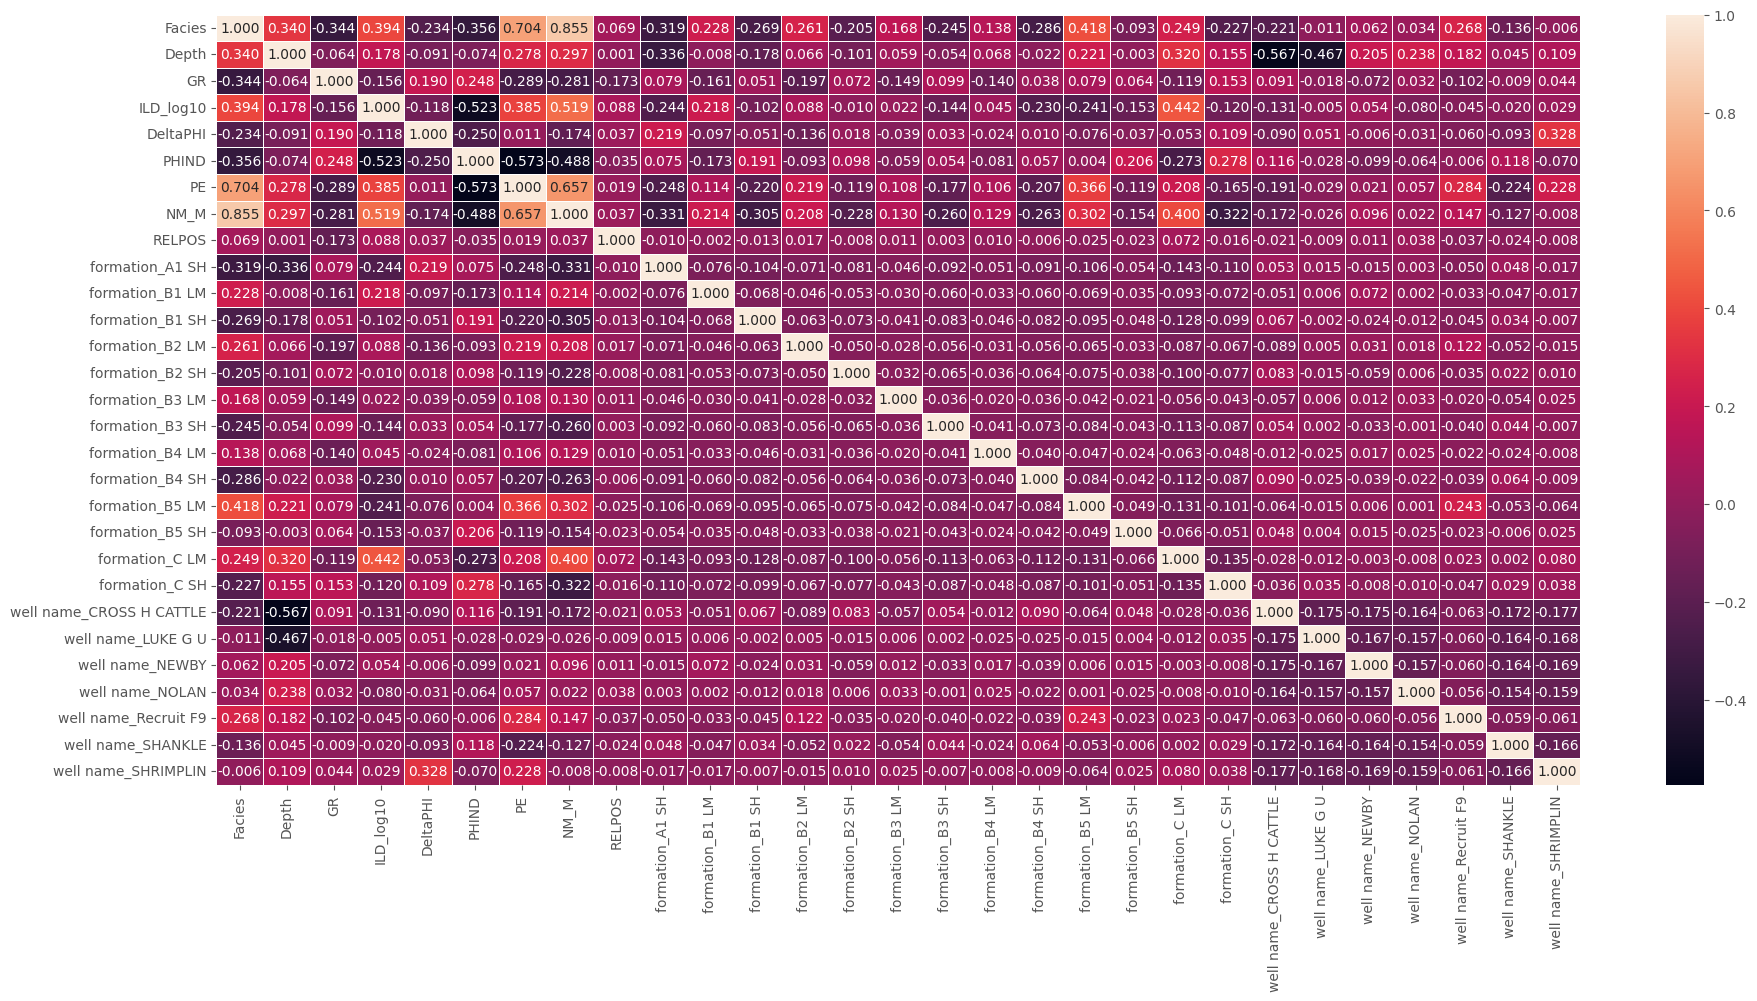

In [21]:
# Increase the figure size
plt.figure(figsize=(22, 10))

# Create the heatmap with adjusted parameters
sns.heatmap(data=df_pred.corr(method= 'pearson'), annot= True, cbar=True, fmt= '.3f', linewidths= .5)

# Show the plot
plt.show()


***1.3.1 Model Selection***

In [22]:
# first using test_train split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

# for SVR scaling is required 
scaler = StandardScaler()
X_train_svr = scaler.fit_transform(X_train)
X_test_svr = scaler.fit_transform(X_test)

In [23]:
# creating a model function
def model(models):
    if model != 'svr':
        trained_model = models.fit(X_train, np.ravel(y_train))         # fitting the train data into the model
        y_predict = trained_model.predict(X_test)
        # calcualting r2 score and MSE of the model
        print('Score of {0} model is: {1} and MSE score is:{2}'.format(models, np.round(trained_model.score(X_test, y_test),3), 
                                                                        round(mean_squared_error(y_test, y_predict),3)))   
    else:
        trained_model = models.fit(X_train_svr, np.ravel(y_train))    
        y_val_pred_svr = trained_model.predict(X_test_svr)                                            
        print('Score of {0} model is {1} and MSE score is:{2}'.format(models, np.round(trained_model.score(X_test_svr, y_test),3), 
                                                                     round(mean_squared_error(y_test, y_val_pred_svr),3)))    

In [24]:
# creating objects of the regressor models
dtr = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()

# storing each model object into list for iteration
lst_= [dtr, rfr, svr]

# calling the model function 
for model_ in lst_:
    model(model_)

Score of DecisionTreeRegressor() model is: 0.815 and MSE score is:0.16
Score of RandomForestRegressor() model is: 0.902 and MSE score is:0.085
Score of SVR() model is: 0.137 and MSE score is:0.746


In [25]:
# using Cross-Validation
X_train_svr_cv = scaler.fit_transform(X)

def CV_score(model):    
    kfold = KFold(n_splits= 8 ,shuffle= True, random_state= 42)
    if model != SVR():
      val_ = cross_validate( model, X, np.ravel(y), cv= kfold, return_train_score= True, return_estimator= True)
      #val_ = cross_val_score(model, X, np.ravel(y), cv= kfold)
      print('Model {0}: Train Score is: {1} Test Score is: {2}'
          .format(model, np.round(np.mean(val_['train_score']), 3), np.round(np.mean(val_['test_score']), 3)))
      
    else:
      val_ = cross_validate( model, X_train_svr_cv, np.ravel(y), cv= kfold, return_train_score= True, return_estimator= True)
      print('Model {0}: Train Score is: {1} Test Score is: {2}'
          .format(model, np.round(np.mean(val_['train_score']), 3), np.round(np.mean(val_['test_score']), 3)))
       

In [26]:
for estimator_ in [DecisionTreeRegressor(random_state= 42), RandomForestRegressor(random_state=42), SVR()]:
    CV_score(estimator_)

Model DecisionTreeRegressor(random_state=42): Train Score is: 1.0 Test Score is: 0.803
Model RandomForestRegressor(random_state=42): Train Score is: 0.985 Test Score is: 0.894
Model SVR(): Train Score is: 0.13 Test Score is: 0.128


It can be seen that both Cross Validation and test_train_Split is showing similar r2_score. 
However `RandomForestRegressor()` model MSE is less than 0 meaning the model fits the training data well. `DecisionTreeRegressor` also has MSE score near to zero but Only `SVR()` model is showing less accuracy. 

Hence, We will be working with `RandomForestRegressor()`.

***1.3.2 Hyperparameters Tuning***

In [27]:
# hyperparameters tuning of Decision Tree Regressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# setting parameters for random forest
param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],  # Number of trees in the forest
    'max_depth': [10, 20, 30, 40, None],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider at each split
}

In [28]:
# grid search method to tune the hyperparameters
kfold = KFold(n_splits= 8 ,shuffle= True, random_state= 42)
# GridSearchCV
rfr_reg = RandomizedSearchCV(RandomForestRegressor(), param_distributions = param_grid, 
                            cv= kfold, return_train_score= True, n_iter=20, verbose= 2, n_jobs= -1)

# fitting the trainning data into the model
rfr_reg.fit(X_train, np.ravel(y_train))

Fitting 8 folds for each of 20 candidates, totalling 160 fits


RandomizedSearchCV(cv=KFold(n_splits=8, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(), n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500,
                                                         1000]},
                   return_train_score=True, verbose=2)

In [29]:
round(rfr_reg.best_score_,3)

0.888

In [30]:
rfr_reg.cv_results_['mean_test_score']

array([0.85768176, 0.83073843, 0.82406884, 0.84635743, 0.8879012 ,
       0.82971481, 0.86288732, 0.86008354, 0.82580503, 0.86061443,
       0.85561943, 0.82548616, 0.88739727, 0.84553377, 0.85810843,
       0.86079091, 0.86598634, 0.839598  , 0.83417718, 0.82274359])

In [31]:
rfr_reg.cv_results_['mean_train_score']

array([0.93485327, 0.89493606, 0.88807733, 0.91759082, 0.9842822 ,
       0.90340651, 0.94599644, 0.93919411, 0.88632402, 0.94174206,
       0.93395992, 0.88961814, 0.9842847 , 0.91837043, 0.94113683,
       0.9420722 , 0.94912229, 0.90762568, 0.90035778, 0.88632902])

In [32]:
rfr_reg.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40}

In [33]:
# predicting missing values using the model

df['PE_Predicted']= rfr.predict(X_missing)          # storing predicted values in a new column

df.PE.fillna(df.PE_Predicted, inplace =True)        # filling NaN vakues with predicted PE values

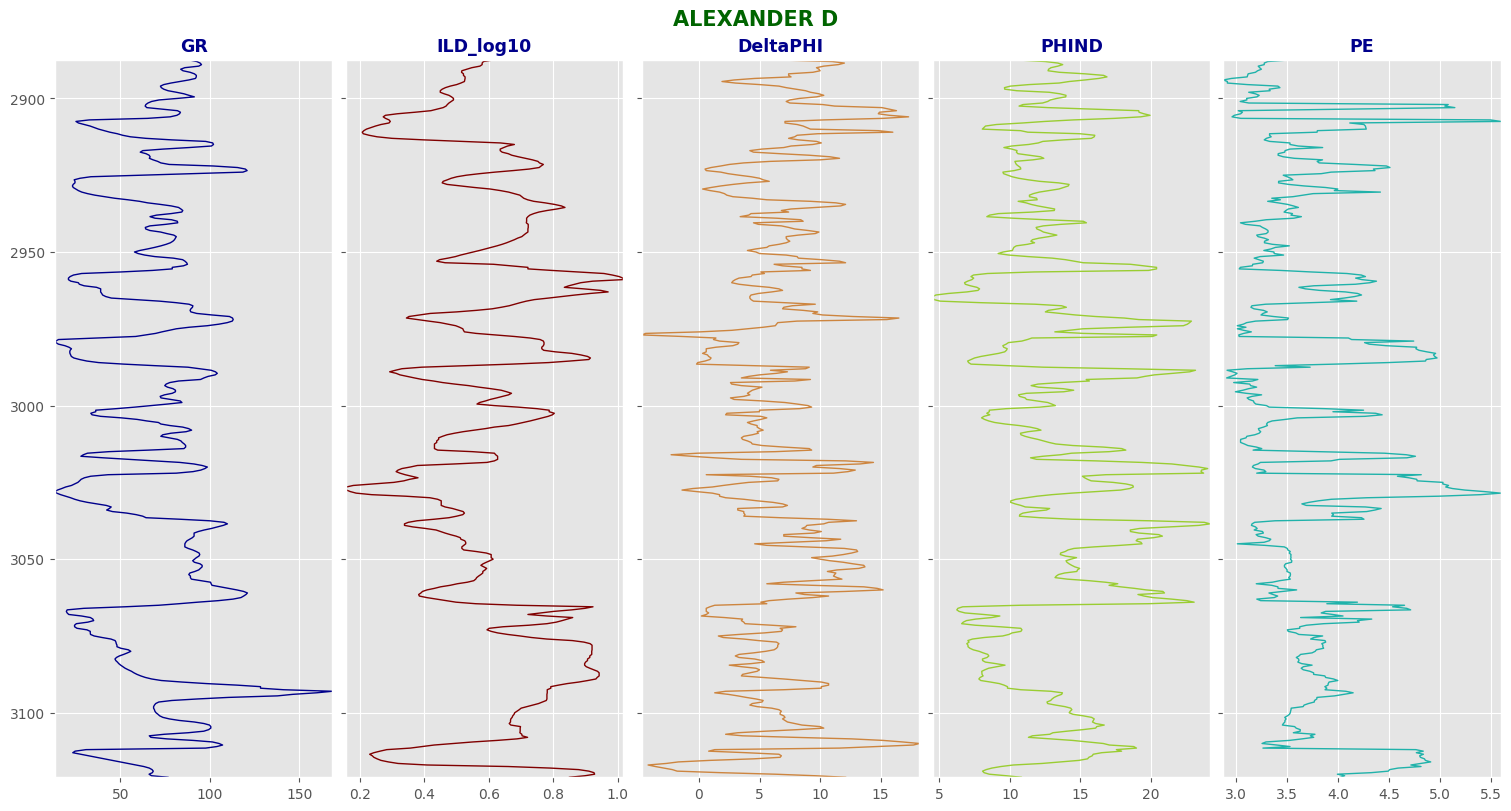

In [34]:
# Creating a condition for separating well whose value was missimg
cond = df['Well Name'] == 'ALEXANDER D'
tmp = df[cond]

data_new = tmp[['Depth','GR','ILD_log10','DeltaPHI','PHIND','PE','Facies_Label']] # taking the neccesary columns only
well = tmp.iloc[1,2]                                                              # Well name

# calling the fucntion
log_plot(data_new, well)

In [35]:
# feature importance
importances = rfr.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X.columns, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
feature_imp_df

,Feature,Gini Importance
6,NM_M,0.273404
0,Facies,0.247070
5,PHIND,0.143613
3,ILD_log10,0.068919
4,DeltaPHI,0.055286
1,Depth,0.051889
27,well name_SHRIMPLIN,0.047617
7,RELPOS,0.037745
2,GR,0.036913
17,formation_B5 LM,0.005713


In [36]:
# dropping predicted column as we don't need it anymore
df.drop(columns= ['PE_Predicted'], inplace = True)

In [37]:
# saving into a new CSV file
df.to_csv(r'c:\Users\sanju\Desktop\AI-ML in Oil and Gas industry\facies_vectors_classification.csv', index= False)